<a href="https://colab.research.google.com/github/Petercode12/Life-Expectancy-Analysis/blob/main/Code_of_life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Import data**

In [ ]:
%%shell
cd /content
gdown -q --id "1iZ6BAl1VBLEfQPyuGL_NUf91rNyAoriI"

In [ ]:
data = pd.read_csv("Life Expectancy Data.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Explore data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

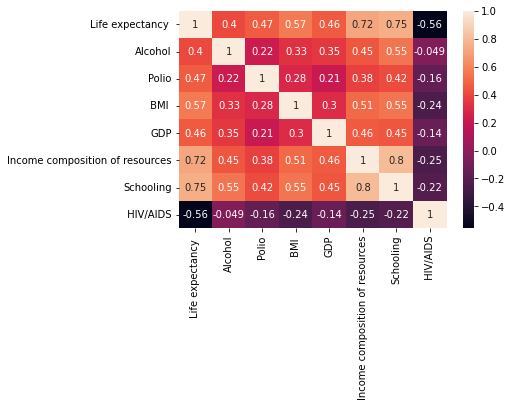

In [ ]:
data2 = data[['Life expectancy ', 'Alcohol', 'Polio', ' BMI ','GDP','Income composition of resources','Schooling', ' HIV/AIDS']]
corr = data2.corr()
sns.heatmap(corr, annot=True)

**Select features (based on correlation)**

In [ ]:
data3 = data[['Status', 'Life expectancy ', 'Alcohol', 'Polio', ' BMI ','GDP','Income composition of resources','Schooling', ' HIV/AIDS']]
data3

,Status,Life expectancy,Alcohol,Polio,BMI,GDP,Income composition of resources,Schooling,HIV/AIDS
0,Developing,65.0,0.01,6.0,19.1,584.259210,0.479,10.1,0.1
1,Developing,59.9,0.01,58.0,18.6,612.696514,0.476,10.0,0.1
2,Developing,59.9,0.01,62.0,18.1,631.744976,0.470,9.9,0.1
3,Developing,59.5,0.01,67.0,17.6,669.959000,0.463,9.8,0.1
4,Developing,59.2,0.01,68.0,17.2,63.537231,0.454,9.5,0.1
...,...,...,...,...,...,...,...,...,...
2933,Developing,44.3,4.36,67.0,27.1,454.366654,0.407,9.2,33.6
2934,Developing,44.5,4.06,7.0,26.7,453.351155,0.418,9.5,36.7
2935,Developing,44.8,4.43,73.0,26.3,57.348340,0.427,10.0,39.8
2936,Developing,45.3,1.72,76.0,25.9,548.587312,0.427,9.8,42.1


**Preprocessing data**

In [ ]:
data3.isnull().sum()

Status                               0
Life expectancy                     10
Alcohol                            194
Polio                               19
 BMI                                34
GDP                                448
Income composition of resources    167
Schooling                          163
 HIV/AIDS                            0
dtype: int64

In [ ]:
data4 = data3.dropna()
data4.isnull().sum()

Status                             0
Life expectancy                    0
Alcohol                            0
Polio                              0
 BMI                               0
GDP                                0
Income composition of resources    0
Schooling                          0
 HIV/AIDS                          0
dtype: int64

In [ ]:
data4

,Status,Life expectancy,Alcohol,Polio,BMI,GDP,Income composition of resources,Schooling,HIV/AIDS
0,Developing,65.0,0.01,6.0,19.1,584.259210,0.479,10.1,0.1
1,Developing,59.9,0.01,58.0,18.6,612.696514,0.476,10.0,0.1
2,Developing,59.9,0.01,62.0,18.1,631.744976,0.470,9.9,0.1
3,Developing,59.5,0.01,67.0,17.6,669.959000,0.463,9.8,0.1
4,Developing,59.2,0.01,68.0,17.2,63.537231,0.454,9.5,0.1
...,...,...,...,...,...,...,...,...,...
2933,Developing,44.3,4.36,67.0,27.1,454.366654,0.407,9.2,33.6
2934,Developing,44.5,4.06,7.0,26.7,453.351155,0.418,9.5,36.7
2935,Developing,44.8,4.43,73.0,26.3,57.348340,0.427,10.0,39.8
2936,Developing,45.3,1.72,76.0,25.9,548.587312,0.427,9.8,42.1


In [ ]:
dummies = pd.get_dummies(data4.Status)
dummies.head(3)

,Developed,Developing
0,0,1
1,0,1
2,0,1


In [ ]:
data5 = pd.concat([data4.drop('Status',axis='columns'), dummies],axis='columns')
data5.head(3)

,Life expectancy,Alcohol,Polio,BMI,GDP,Income composition of resources,Schooling,HIV/AIDS,Developed,Developing
0,65.0,0.01,6.0,19.1,584.259210,0.479,10.1,0.1,0,1
1,59.9,0.01,58.0,18.6,612.696514,0.476,10.0,0.1,0,1
2,59.9,0.01,62.0,18.1,631.744976,0.470,9.9,0.1,0,1


**Train models**

In [ ]:
X = data5.drop('Life expectancy ', axis='columns')
X.head()

,Alcohol,Polio,BMI,GDP,Income composition of resources,Schooling,HIV/AIDS,Developed,Developing
0,0.01,6.0,19.1,584.259210,0.479,10.1,0.1,0,1
1,0.01,58.0,18.6,612.696514,0.476,10.0,0.1,0,1
2,0.01,62.0,18.1,631.744976,0.470,9.9,0.1,0,1
3,0.01,67.0,17.6,669.959000,0.463,9.8,0.1,0,1
4,0.01,68.0,17.2,63.537231,0.454,9.5,0.1,0,1


In [ ]:
y = data5['Life expectancy ']
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [ ]:
#20% test - 80% train
X = data5.drop('Life expectancy ', axis='columns')
y = data5['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
#Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test,y_test)

0.9461099653213947

In [ ]:
#Linear Regression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.7703084622982219

In [ ]:
#Lasso Regression
modelLasso = Lasso(alpha=0.8)
modelLasso.fit(X_train, y_train)
modelLasso.score(X_test,y_test)

0.7489349293449861

In [ ]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(Lasso(alpha=0.8), X, y, cv = cv)

array([0.77560974, 0.7813822 , 0.77096243, 0.76938786, 0.74200145])

In [ ]:
def predict_expectancy(Status,Alcohol,Polio,BMI,GDP,Income,Schooling,HIV):
    loc_index = np.where(X.columns==Status)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = Alcohol
    x[1] = Polio
    x[2] = BMI
    x[3] = GDP
    x[4] = Income
    x[5] = Schooling
    x[6] = HIV
    if loc_index >= 0:
        x[loc_index] =  1
    return modelLasso.predict([x])[0]

In [ ]:
predict_expectancy('Developed',0.01,6.0,19.1,584.259210,0.479,10.1,0.1)

61.81712205829855

**Evaluation**

In [ ]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
#Random Forest Regressor evaluation
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.4096761388286234
MSE: 4.3045077609327835
RMSE: 2.0747307683005003
R2 Square 0.9462686523886463
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5833295713510787
MSE: 0.7569218832989897
RMSE: 0.8700125765177131
R2 Square 0.9922588094202553
__________________________________


In [ ]:
#Linear Regression evaluation
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.194931421790469
MSE: 18.400971697366654
RMSE: 4.289635380468444
R2 Square 0.7703084622982219
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.2628688786258406
MSE: 18.724129432845753
RMSE: 4.327138711995
R2 Square 0.8085046058548022
__________________________________


In [ ]:
#Lasso Regression evaluation
test_pred = modelLasso.predict(X_test)
train_pred = modelLasso.predict(X_train)
print("Lasso Regression model")
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Lasso Regression model
Test set evaluation:
_____________________________________
MAE: 3.4437549579484124
MSE: 20.113241025529117
RMSE: 4.484778815675208
R2 Square 0.7489349293449861
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.4626282149783387
MSE: 20.556543305350242
RMSE: 4.53393243281704
R2 Square 0.7897641448891335
__________________________________
